In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)
root_path = 'gdrive/My Drive/Colab Notebooks/CS230_PROJECT' 

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/CS230_PROJECT/MSFT_Premium.csv')

In [16]:
df.head

<bound method NDFrame.head of       Unnamed: 0 ticker_x        date  ...  taxliabilities   tbvps  workingcapital
0             77     MSFT  2014-04-24  ...    3.012000e+09  16.715    7.510300e+10
1             78     MSFT  2014-04-25  ...    3.012000e+09  16.715    7.510300e+10
2             79     MSFT  2014-04-28  ...    3.012000e+09  16.715    7.510300e+10
3             80     MSFT  2014-04-29  ...    3.012000e+09  16.715    7.510300e+10
4             81     MSFT  2014-04-30  ...    3.012000e+09  16.715    7.510300e+10
...          ...      ...         ...  ...             ...     ...             ...
1396        1473     MSFT  2019-11-07  ...    3.213100e+10  30.041    1.077780e+11
1397        1474     MSFT  2019-11-08  ...    3.213100e+10  30.041    1.077780e+11
1398        1475     MSFT  2019-11-11  ...    3.213100e+10  30.041    1.077780e+11
1399        1476     MSFT  2019-11-12  ...    3.213100e+10  30.041    1.077780e+11
1400        1477     MSFT  2019-11-13  ...    3.213100e+1

In [17]:
#features_considered = ['open','high','low','close','volume','dividends','ev_x','evebit_x','evebitda_x','marketcap_x','pb_x','pe_x','ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','deposits','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','fxusd','gp','grossmargin','intangibles','intexp','invcap','invcapavg','inventory','investments','investmentsc','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netincdis','netincnci','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','prefdivis','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharefactor','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
# 41 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt']
# 54 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin']
# 77 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin']
# 98 features lists - to explore -
#features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp']
# 109 features lists - to explore -
features_considered = ['open', 'high', 'low', 'close', 'volume','dividends', 'ev_x', 'evebit_x', 'evebitda_x', 'marketcap_x', 'pb_x', 'pe_x', 'ps_x','accoci','assets','assetsavg','assetsc','assetsnc','assetturnover','bvps','capex','cashneq','cashnequsd','cor','consolinc','currentratio','de','debt','debtc','debtnc','debtusd','deferredrev','depamor','divyield','dps','ebit','ebitda','ebitdamargin','ebitdausd','ebitusd','ebt','eps','epsdil','epsusd','equity','equityavg','equityusd','ev_y','evebit_y','evebitda_y','fcf','fcfps','gp','grossmargin','intangibles','invcap','invcapavg','inventory','investmentsnc','liabilities','liabilitiesc','liabilitiesnc','marketcap_y','ncf','ncfbus','ncfcommon','ncfdebt','ncfdiv','ncff','ncfi','ncfinv','ncfo','ncfx','netinc','netinccmn','netinccmnusd','netmargin','opex','opinc','payables','payoutratio','pb_y','pe_y','pe1','ppnenet','price','ps_y','ps1','receivables','retearn','revenue','revenueusd','rnd','roa','roe','roic','ros','sbcomp','sgna','sharesbas','shareswa','shareswadil','sps','tangibles','taxassets','taxexp','taxliabilities','tbvps','workingcapital']
features = df[features_considered]
features.index = df['date']
features.head()

,open,high,low,close,volume,dividends,ev_x,evebit_x,evebitda_x,marketcap_x,pb_x,pe_x,ps_x,accoci,assets,assetsavg,assetsc,assetsnc,assetturnover,bvps,capex,cashneq,cashnequsd,cor,consolinc,currentratio,de,debt,debtc,debtnc,debtusd,deferredrev,depamor,divyield,dps,ebit,ebitda,ebitdamargin,ebitdausd,ebitusd,...,ncfi,ncfinv,ncfo,ncfx,netinc,netinccmn,netinccmnusd,netmargin,opex,opinc,payables,payoutratio,pb_y,pe_y,pe1,ppnenet,price,ps_y,ps1,receivables,retearn,revenue,revenueusd,rnd,roa,roe,roic,ros,sbcomp,sgna,sharesbas,shareswa,shareswadil,sps,tangibles,taxassets,taxexp,taxliabilities,tbvps,workingcapital
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-04-24,39.74,39.97,39.30,39.86,42381600.0,0.0,263514.0,9.6,8.3,329260.0,3.8,14.7,4.0,3.332000e+09,1.561190e+11,1.486102e+11,1.090060e+11,4.711300e+10,0.561,10.553,-5.949000e+09,8.842500e+10,8.842500e+10,2.494100e+10,2.242700e+10,3.215,0.786,2.267900e+10,2.000000e+09,2.067900e+10,2.267900e+10,1.951200e+10,4.453000e+09,0.026,1.02,2.738800e+10,3.184100e+10,0.382,3.184100e+10,2.738800e+10,...,-1.576200e+10,-9.712000e+09,2.862000e+10,28000000.0,2.242700e+10,2.242700e+10,2.242700e+10,0.269,3.105600e+10,2.735000e+10,5.377000e+09,0.379,3.766,14.681,14.818,1.177100e+10,39.86,3.95,3.962,1.349700e+10,1.628900e+10,8.334700e+10,8.334700e+10,1.104100e+10,0.151,0.269,0.835,0.329,2.165000e+09,2.001500e+10,8.260412e+09,8.284000e+09,8.367000e+09,10.061,1.384670e+11,1.424000e+09,4.961000e+09,3.012000e+09,16.715,7.510300e+10
2014-04-25,40.29,40.68,39.75,39.91,56876800.0,0.0,263927.0,9.6,8.3,329673.0,3.8,14.7,4.0,3.332000e+09,1.561190e+11,1.486102e+11,1.090060e+11,4.711300e+10,0.561,10.553,-5.949000e+09,8.842500e+10,8.842500e+10,2.494100e+10,2.242700e+10,3.215,0.786,2.267900e+10,2.000000e+09,2.067900e+10,2.267900e+10,1.951200e+10,4.453000e+09,0.026,1.02,2.738800e+10,3.184100e+10,0.382,3.184100e+10,2.738800e+10,...,-1.576200e+10,-9.712000e+09,2.862000e+10,28000000.0,2.242700e+10,2.242700e+10,2.242700e+10,0.269,3.105600e+10,2.735000e+10,5.377000e+09,0.379,3.766,14.681,14.818,1.177100e+10,39.86,3.95,3.962,1.349700e+10,1.628900e+10,8.334700e+10,8.334700e+10,1.104100e+10,0.151,0.269,0.835,0.329,2.165000e+09,2.001500e+10,8.260412e+09,8.284000e+09,8.367000e+09,10.061,1.384670e+11,1.424000e+09,4.961000e+09,3.012000e+09,16.715,7.510300e+10
2014-04-28,40.14,41.29,40.09,40.87,50610200.0,0.0,271857.0,9.9,8.5,337603.0,3.9,15.1,4.1,3.332000e+09,1.561190e+11,1.486102e+11,1.090060e+11,4.711300e+10,0.561,10.553,-5.949000e+09,8.842500e+10,8.842500e+10,2.494100e+10,2.242700e+10,3.215,0.786,2.267900e+10,2.000000e+09,2.067900e+10,2.267900e+10,1.951200e+10,4.453000e+09,0.026,1.02,2.738800e+10,3.184100e+10,0.382,3.184100e+10,2.738800e+10,...,-1.576200e+10,-9.712000e+09,2.862000e+10,28000000.0,2.242700e+10,2.242700e+10,2.242700e+10,0.269,3.105600e+10,2.735000e+10,5.377000e+09,0.379,3.766,14.681,14.818,1.177100e+10,39.86,3.95,3.962,1.349700e+10,1.628900e+10,8.334700e+10,8.334700e+10,1.104100e+10,0.151,0.269,0.835,0.329,2.165000e+09,2.001500e+10,8.260412e+09,8.284000e+09,8.367000e+09,10.061,1.384670e+11,1.424000e+09,4.961000e+09,3.012000e+09,16.715,7.510300e+10
2014-04-29,41.10,41.19,40.39,40.51,29636200.0,0.0,268883.3,9.8,8.4,334629.3,3.8,14.9,4.0,3.332000e+09,1.561190e+11,1.486102e+11,1.090060e+11,4.711300e+10,0.561,10.553,-5.949000e+09,8.842500e+10,8.842500e+10,2.494100e+10,2.242700e+10,3.215,0.786,2.267900e+10,2.000000e+09,2.067900e+10,2.267900e+10,1.951200e+10,4.453000e+09,0.026,1.02,2.738800e+10,3.184100e+10,0.382,3.184100e+10,2.738800e+10,...,-1.576200e+10,-9.712000e+09,2.862000e+10,28000000.0,2.242700e+10,2.242700e+10,2.242700e+10,0.269,3.105600e+10,2.735000e+10,5.377000e+09,0.379,3.766,14.681,14.818,1.177100e+10,39.86,3.95,3.962,1.349700e+10,1.628900e+10,8.334700e+10,8.334700e+10,1.104100e+10,0.151,0.269,0.835,0.329,2.165000e+09,2.001500e+10,8.260412e+09,8.284000e+09,8.367000e+09,10.061,1.384670e+11,1.424000e+09,4.961000e+09,3.012000e+09,16.715,7.510300e+10
2014-04-30,40.40,4

In [0]:
TRAIN_SPLIT=np.int(len(df)*0.8) 
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [0]:
#print(dataset)

In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])
  print(labels)
  return np.array(data), np.array(labels)

In [44]:
past_history = 60
future_target = 1
STEP = 1
np.random.seed(3)
x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 3], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 3],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

[-0.9027726790836406, -0.9007669824862821, -0.9243339175052446, -0.9193196760118483, -0.9458951559268486, -0.9501572611962354, -0.9655509825809618, -0.9865105120233586, -1.0015532365035473, -0.9759806048872264, -0.9905219052180756, -1.0075703262956228, -0.9830005429779812, -0.9845048154259998, -0.9845048154259998, -0.9684592426471317, -0.9403794902841127, -0.9308524314466595, -0.9047783756809991, -0.888732802902131, -0.8777014716166591, -0.8967555892915648, -0.8832171372593951, -0.8867271063047725, -0.885724258006093, -0.8939977564701969, -0.9007669824862821, -0.9002655583369422, -0.8726872301232628, -0.88973565120081, -0.8962541651422253, -0.8812114406620366, -0.8486188709549608, -0.8205391185919415, -0.8059978182610923, -0.8019864250663751, -0.7939636386769412, -0.8092570752317998, -0.8320718740267528, -0.8059978182610923, -0.8180319978452432, -0.8100092114558093, -0.7678895829112803, -0.7909550937809032, -0.8160263012478847, -0.7899522454822242, -0.8421003570135455, -0.8235476634879

In [45]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))
print ('Single sample of Future : {}'.format(y_train_single[0].shape))

Single window of past history : (60, 109)
Single sample of Future : ()


In [0]:
BATCH_SIZE = 60
BUFFER_SIZE = len(df)

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [47]:
print(x_train_single.shape)
print(y_train_single.shape)
print(x_val_single.shape)
print(y_val_single.shape)

(1060, 60, 109)
(1060,)
(220, 60, 109)
(220,)


In [0]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(128,return_sequences=True,input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.LSTM(64,input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))



In [0]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 9e-2 * 10**(epoch / 50))
optimizer = tf.keras.optimizers.SGD(lr=9e-2, momentum=0.90)
single_step_model.compile(loss=tf.keras.losses.Huber(),optimizer=optimizer,metrics=["mae"])

#single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [50]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(60, 1)


In [51]:
EPOCHS=50
EVALUATION_INTERVAL=len(df)
history = single_step_model.fit(train_data_single, epochs=EPOCHS, steps_per_epoch=EVALUATION_INTERVAL, validation_data=val_data_single,
                                            validation_steps=50, callbacks=[lr_schedule])

#history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            #steps_per_epoch=EVALUATION_INTERVAL,
                                            #validation_data=val_data_single,
                                            #validation_steps=50)

1401/1401 [==============================] - 48s 34ms/step - loss: 9.6976e-04 - mae: 0.0322 - val_loss: 0.7807 - val_mae: 1.1497
Epoch 7/50
1401/1401 [==============================] - 48s 34ms/step - loss: 8.9470e-04 - mae: 0.0310 - val_loss: 0.8081 - val_mae: 1.1718
Epoch 8/50
1401/1401 [==============================] - 48s 34ms/step - loss: 8.1382e-04 - mae: 0.0293 - val_loss: 0.7813 - val_mae: 1.1440
Epoch 9/50
1401/1401 [==============================] - 48s 34ms/step - loss: 7.7216e-04 - mae: 0.0286 - val_loss: 0.8190 - val_mae: 1.1785
Epoch 10/50
1401/1401 [==============================] - 48s 34ms/step - loss: 7.1123e-04 - mae: 0.0273 - val_loss: 0.8085 - val_mae: 1.1713
Epoch 11/50
1401/1401 [==============================] - 47s 34ms/step - loss: 6.8545e-04 - mae: 0.0268 - val_loss: 0.8137 - val_mae: 1.1834
Epoch 12/50
1401/1401 [==============================] - 48s 34ms/step - loss: 6.5509e-04 - mae: 0.0263 - val_loss: 0.7968 - val_mae: 1.1775
Epoch 13/50
1401/1401 [=====

[0.9, 2, 0, 0.01]

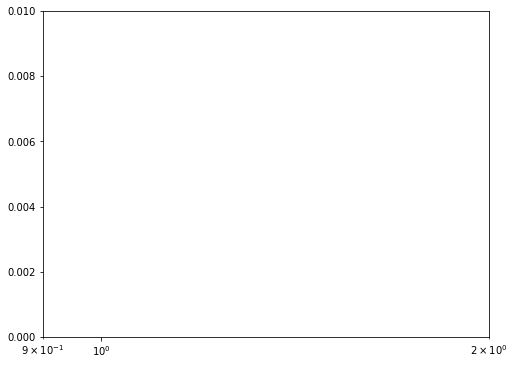

In [111]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([9e-1, 2, 0, 0.01])